In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
from keras.datasets import imdb

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

In [4]:
print(x_train[0])
print(y_train[0])
class_names = ['Negative', 'Positive']

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
word_index = imdb.get_word_index()
print(word_index['hello'])

reverse_word_index = dict((value,key) for key,value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

4822


In [6]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [7]:
def show_len():
    print('Len of 1st training example: ', len(x_train[0]))
    print('Len of 2nd training example: ', len(x_train[1]))
    print('Len of 1st test example: ', len(x_test[0]))
    print('Len of 2nd test example: ', len(x_test[1]))
    
show_len()

Len of 1st training example:  218
Len of 2nd training example:  189
Len of 1st test example:  68
Len of 2nd test example:  260


In [8]:
word_index['the']

1

In [9]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [10]:
show_len()

Len of 1st training example:  256
Len of 2nd training example:  256
Len of 1st test example:  256
Len of 2nd test example:  256


In [11]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [14]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation ='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs= E,
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

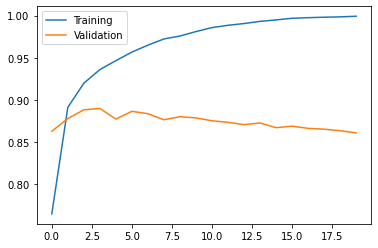

In [19]:
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

In [20]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ',acc*100)

782/782 [==============================] - 2s 2ms/step - loss: 0.9586 - accuracy: 0.8415
Test set accuracy:  84.15200114250183


In [21]:
p = model.predict(np.expand_dims(x_test[1], axis = 0))
print(class_names[int(p[0]>0.5)])

Positive


In [22]:
decode(x_test[1])

"is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence and of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of and pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room sugar as it by br be plot many for occasio